# Model Task Types - Regression

### Imports

In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from helpers import get_houses_data, plot_results

### Generate our sample dataset

Add brief explanation of what we are doing.
Explain that the sample mock data has a linear correlation to make this example more illustrative

In [3]:
# Get the sample houses
bedrooms, square_feet, price = get_houses_data()

# Create a DataFrame with the data
df = pd.DataFrame({
    'Bedrooms': bedrooms,
    'Area': square_feet * 1000,  # Convert area to square feet
    'Price': price
})

# Print the first few rows to demonstrate the data
print("Sample Data:\n")
print(df.head().to_string(index=False))

Sample Data:

 Bedrooms        Area         Price
        4 2795.903221 645231.521431
        5 2640.092587 650380.472850
        3 1678.681618 442830.493360
        5  828.984280 367130.225178
        5 1489.963805 468356.016471


We use **pandas** in this example because it provides an intuitive and powerful way to work with tabular data, similar to a spreadsheet or database table. With pandas, we can efficiently create, manipulate, and analyze datasets using its **DataFrame** structure. 
This makes it easy to perform operations like selecting columns, filtering rows, and summarizing data. For this example, pandas helps us organize our generated dataset, inspect the first few rows of data, and prepare the features and target variables for training the regression model.

It's a very versatile and simple tool for handling data in data science and machine learning workflows.

### Splitting our data

In [4]:
# Split features and target
X = df[["Area", "Bedrooms"]]
y = df["Price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,  # Features: Area, Bedrooms
    y,  # Target: Price
    # input_features,
    # price,
    test_size=0.2,  # 20% of the data will be used for testing, the rest for training
    random_state=42
)

# Display a preview of the training and testing sets
# print("Training Features (X_train):\n", X_train.head().to_string(index=False))
# print("\nTesting Features (X_test):\n", X_test.head().to_string(index=False))
# print("\nTraining Target (y_train):\n", y_train.head().to_string(index=False))
# print("\nTesting Target (y_test):\n", y_test.head().to_string(index=False))


Add explanation
Also talk about random_state=42

### Instantiate the model

Explanation here: Instantiate the Linear Regression Model

In [5]:
model = LinearRegression()

### Train the model

Explanation about the training

In [6]:
model.fit(
    # sample features: area, bedrooms, age
    X_train,
    # expected output target: price
    y_train,
)

LinearRegression()

### Generate the predictions

Add brief prediction explanation

In [7]:
# Use the 20% split of our date to make predictions
predictions = model.predict(X_test)

### Visualize and compare the predictions

More explanation here

In [8]:
# Create a DataFrame to display actual vs predicted prices
results_df = pd.DataFrame(
    {
        "Area": X_test["Area"].tolist(),  # Area of the house
        "Bedrooms": X_test["Bedrooms"].tolist(),  # Number of bedrooms
        "Expected Price": y_test.tolist(),        # Expected prices from the dataset
        "Predicted Price": predictions.tolist(),  # Predicted prices from the model
    }
)

# Calculate the error between actual and predicted prices (round the predicted prices to the nearest whole number)
results_df["Price Error"] = results_df["Expected Price"] - results_df["Predicted Price"].round(0).astype(int)

# Display the results (only the first 10 rows)
print(results_df.head(10))

          Area  Bedrooms  Expected Price  Predicted Price   Price Error
0  1557.178662         5   481301.633410    482951.467819  -1649.366590
1  1246.589601         5   437241.589222    436500.175051    741.589222
2  1428.170995         1   340890.932415    343973.140835  -3082.067585
3  2154.456289         1   453012.509404    452595.417306    417.509404
4  1253.117399         2   361887.300011    347713.381760  14174.300011
5  2719.872621         2   563744.105570    567079.370090  -3334.894430
6  1740.888536         4   481886.575563    480505.848339   1380.575563
7  2527.535415         5   638578.050577    628076.751800  10501.050577
8  1519.024499         4   444846.688684    447324.153927  -2477.311316
9  2795.903221         4   645231.521431    638292.461684   6939.521431


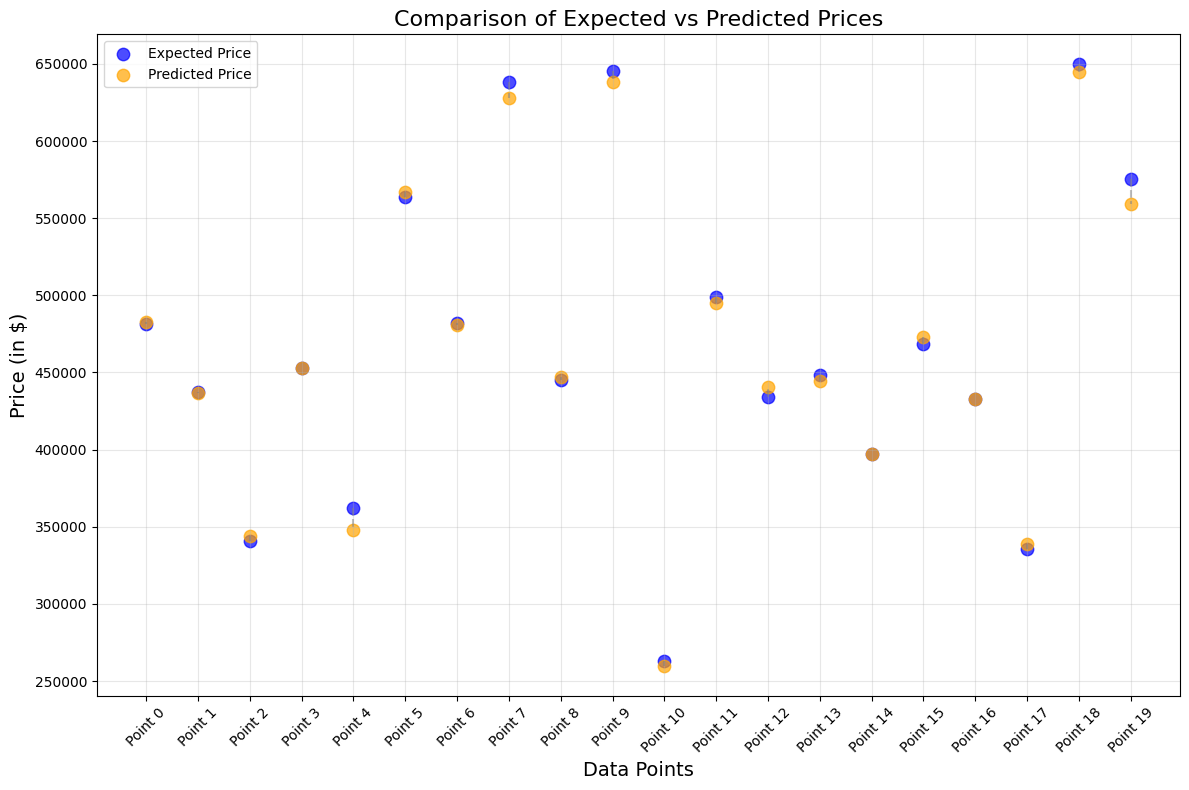

In [10]:
# Plot setup
plot_results(results_df)


In [127]:
## DO NOT INCLUDE - OR INCLUDE A DIFFERENT WAY OF COMPARING THE RESULTS NOT WITH MSE or a better percentage of MSE?
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)

# Display coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

## Mean Squared Error: 1081143151.3409953


Mean Squared Error: 39756768.12977753
Intercept: 100456.731634976
Coefficients: [  149.55868908 29921.02737143]
